# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json 

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()

print(json.dumps(btc_response, indent=4))   #output looks better this way

btc_price = btc_response['data']['1']['quotes']['USD']['price']

#btc_price

# Fetch current ETH price
eth_response = requests.get(eth_url).json()

print(json.dumps(eth_response, indent=4))

eth_price = eth_response['data']['1027']['quotes']['USD']['price']

#eth_price

# Compute current value of my crpto
my_btc_value = my_btc * btc_price

my_eth_value = my_eth * eth_price 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19006500,
            "total_supply": 19006500,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42495.0,
                    "volume_24h": 24033660151,
                    "market_cap": 807464497881,
                    "percentage_change_1h": 0.144715104639124,
                    "percentage_change_24h": -2.25497090122459,
                    "percentage_change_7d": -8.15871094205096,
                    "percent_change_1h": 0.144715104639124,
                    "percent_change_24h": -2.25497090122459,
                    "percent_change_7d": -8.15871094205096
                },
                "CAD": {
                    "price": 53403.4665,
                    "volume_24h": 30203100711.7617,
                   

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [ ]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-04-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_closing_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_closing_prices

# Reorganize the DataFrame
# Separate ticker data
AGG = df_closing_prices[df_closing_prices['symbol'] == 'AGG']. drop('symbol', axis=1)
SPY = df_closing_prices[df_closing_prices['symbol'] == 'SPY']. drop('symbol', axis=1)


# Concatenate the ticker DataFrames

ticker_combined_df = pd.concat([AGG, SPY], axis=1, keys= ['AGG','SPY'])

# Preview DataFrame
ticker_combined_df.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2022-04-08 04:00:00+00:00  104.82  105.01  104.615  104.73  6501822   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.63  445.94   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-08 04:00:00+00:00  447.57  79148376      573491  448.250805

In [ ]:
df_closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
for ticker in tickers:
    df_closing_prices[ticker] = ticker_combined_df[ticker]["close"]
# Print AGG and SPY close prices
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices = df_closing_prices.reset_index()

df_closing_prices = df_closing_prices.rename(columns={"index":"Date"})

df_closing_prices = df_closing_prices.set_index('Date')

df_closing_prices

agg_close_price = float(ticker_combined_df['AGG']['close'][0])    #I added "float" as per bcs support's advice. It will help sorting through the data and pulling up the numeric value 
spy_close_price = float(ticker_combined_df['SPY']['close'][0])

#agg_close_price

#spy_close_price = df_closing_prices['SPY']

#spy_close_price

#print closing prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.73
Current SPY closing price: $447.57


In [ ]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22378.50
The current value of your 200 AGG shares is $20946.00


### Savings Health Analysis

In [1394]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data


# Create savings DataFrame
df_savings = pd.DataFrame([
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
], 
columns= ["amount"],
index= ["crypto", "shares"]

)

# Display savings DataFrame
display(df_savings)

,amount
crypto,68067.314
shares,43324.500


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

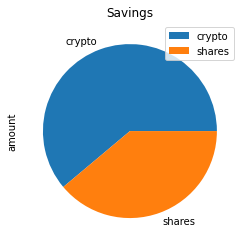

In [1395]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Savings")

In [1396]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
#total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings account!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your desired amount of savings!")
else:
    print(f"Unfortunately you need ${emergency_fund - total_savings} to reach your savings goal.")






Congratulations! You have enough money in your savings account!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [1397]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-01', tz='America/New_York').isoformat()

In [1398]:
# Get 5 years' worth of historical data for SPY and AGG


df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data
# Reorganize the DataFrame
#df_stock_data = df_stock_data.drop('symbol', axis=1)

df_stock_data

# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG']. drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY']. drop('symbol', axis=1)
#SPY
#AGG
# Concatenate the ticker DataFrames

df_new_stock_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_new_stock_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.03  233.910   
2017-04-04 04:00:00+00:00        8325  108.591265  235.00  235.58  234.555   
2017-04-05 04:00:00+00:00       11167  108.599103  236.26  237.39  234.540   
2017-04-06 04:00:00+00:00        7746  108.588276  234.96  236.04  234.425   
2017-04-07 04:00:00+00:00        8534  108.645684  235.18  236.00  234.640   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-03 04:00:00+00:00  235.33   85546486      278486  235.194832  
2017-04-04 04:00:00+00:00  235.48   56466195      192579  235.237449  
2017-04-05 04:00:00+00:00  234.78  108800604      363080  235.933657  
2017-04-06 04:00:00+00:00  235.44   69135757      244996  235.287745  
2017-04-07 04:00:00+00:00  235.20   74412311      235941  235.290964

In [1399]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_new_stock_data,
    weights = [.40,.60],
    num_simulation = 500,       #500 runs
    num_trading_days = 252*30   #30 years
)

In [1400]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-03 04:00:00+00:00       15992  108.605513          NaN  235.79   
2017-04-04 04:00:00+00:00        8325  108.591265    -0.000920  235.00   
2017-04-05 04:00:00+00:00       11167  108.599103     0.001105  236.26   
2017-04-06 04:00:00+00:00        7746  108.588276    -0.000092  234.96   
2017-04-07 04:00:00+00:00        8534  108.645684    -0.002208  235.18   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-04-03 04:00:00+00:00  236.03  233.910  235.33   85546486      278486   
2017-04-04 04:00:00+00:00  235.58  234.555  235.48   56466195      192579   
2017-04-05 04:00:00+00:00  237.39  234.540  234.78  108800604      363080   
2017-04-06 04:00:00+00:00  236.04  234.425  235.44   69135757      244996   
2017-04-07 04:00:00+00:00  236.00  234.640  235.20   74412311      235941   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-03 04:00:00+00:00  235.194832          NaN  
2017-04-04 04:00:00+00:00  235.237449     0.000637  
2017-04-05 04:00:00+00:00  235.933657    -0.002973  
2017-04-06 04:00:00+00:00  235.287745     0.002811  
2017-04-07 04:00:00+00:00  235.290964    -0.001019

In [1401]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\MIA-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001997,1.004371,1.006061,0.996926,1.017846,1.005969,0.983439,1.007696,0.997601,0.996957,...,1.009292,1.004251,0.992472,0.993782,0.994149,1.012404,1.006746,1.003632,0.998868,0.988698
2,1.009226,0.994861,1.009107,1.007876,1.016898,1.013826,0.985179,1.016808,0.994379,0.990033,...,1.012523,1.013594,0.988373,0.990395,0.994990,1.009760,0.999334,1.009730,1.001203,1.006277
3,0.999243,0.981954,1.024000,0.996645,1.020674,1.019590,0.989599,1.032279,0.994700,0.980272,...,1.012505,1.011077,0.996696,0.972650,0.995145,1.009099,0.997853,1.014795,1.001540,1.007853
4,0.999291,0.991285,1.033258,0.992434,1.018031,1.019355,0.991181,1.034155,0.991605,0.984137,...,1.014746,1.022174,0.992425,0.958326,1.014949,0.989822,1.007768,1.023753,1.001505,1.019603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.878770,20.320624,6.942938,23.162315,19.551483,7.350155,7.509538,11.398550,5.842884,11.454406,...,13.969508,5.478304,16.057613,3.478768,6.782513,8.096889,20.295608,18.995561,15.823317,6.131553
7557,5.885905,20.805336,6.886921,23.073466,19.574196,7.404514,7.525985,11.497605,5.817908,11.540110,...,13.833855,5.451791,16.080277,3.480443,6.807157,8.185750,20.087111,19.153264,15.889694,6.022954
7558,5.891730,20.793629,6.813379,22.865734,19.581871,7.336328,7.506203,11.714278,5.810045,11.532219,...,13.756022,5.476246,16.045634,3.461194,6.936187,8.239767,20.355086,18.975417,15.702777,6.007720
7559,5.838684,20.718972,6.831267,22.868789,19.594617,7.386250,7.418027,11.756140,5.831969,11.526532,...,13.683301,5.465113,16.150215,3.397485,6.896141,8.153285,20.243380,19.343864,15.690810,6.017150


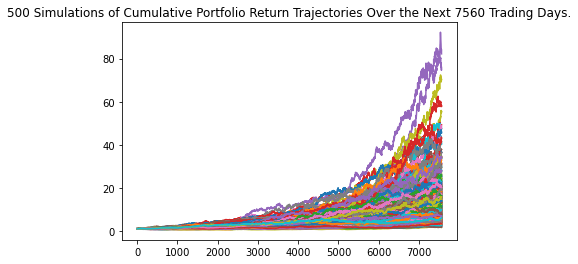

In [1402]:
# Plot simulation outcomes
plot = MC_thirty_years.plot_simulation()

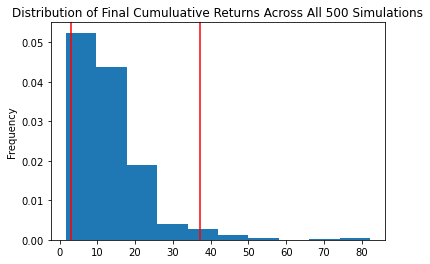

In [1403]:
# Plot probability distribution and confidence intervals
probability_dist_chart = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [1404]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_thirty_years.summarize_cumulative_return()
# Print summary statistics
print(summary_stats)

count           500.000000
mean             13.380507
std               9.779813
min               1.650614
25%               7.170936
50%              11.139486
75%              16.549603
max              82.206766
95% CI Lower      3.029535
95% CI Upper     37.167745
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [1405]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60590.7 and $743354.9


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [1413]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90886.06 and $1115032.35


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [1414]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_new_stock_data,
    weights = [.40,.60],
    num_simulation = 500,       #500 runs
    num_trading_days = 252*5   #5 years
)

In [1415]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\MIA-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996150,0.998266,1.009629,1.005774,1.008915,1.006430,1.000060,1.011486,0.998654,0.987310,...,0.996857,1.006340,1.005132,1.002937,0.997046,0.997096,0.987102,1.001130,1.010497,1.004461
2,1.009474,0.987636,1.014433,1.006293,1.006331,1.018312,0.996216,1.007749,0.994646,0.976752,...,0.986269,1.007982,1.020476,0.995329,1.003694,1.001826,0.999566,0.997371,1.013898,1.007720
3,1.018696,0.993877,1.009623,1.002337,1.003526,1.028396,0.999366,1.003602,0.984450,0.976475,...,1.000187,1.011353,1.020473,1.008146,1.011504,1.003057,1.003201,0.997410,1.025835,1.003040
4,1.023620,0.995135,1.009722,1.002746,1.008318,1.028385,0.998436,1.015664,0.989862,0.980610,...,0.992486,1.011368,1.024233,1.009204,1.002348,1.014736,0.987483,0.997584,1.032388,1.000581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.010842,1.622228,1.141055,1.734110,1.282779,2.513677,2.463975,1.384597,1.519823,1.649635,...,1.957398,1.991145,1.964473,1.282412,1.778678,1.606317,0.622062,2.337620,1.382906,1.649597
1257,1.018143,1.653887,1.127743,1.751412,1.278487,2.492767,2.451139,1.394681,1.542134,1.667893,...,1.982911,1.996120,1.974046,1.289564,1.787127,1.620792,0.618685,2.338434,1.387022,1.642422
1258,1.012776,1.666913,1.128885,1.773341,1.279057,2.536719,2.447944,1.395233,1.543263,1.671064,...,1.990333,2.024749,1.971195,1.285735,1.775350,1.595316,0.618637,2.323337,1.393452,1.630806
1259,1.005265,1.681910,1.141581,1.778454,1.286958,2.593474,2.441376,1.391219,1.541630,1.678836,...,2.008932,2.006273,1.964645,1.272336,1.786271,1.601661,0.620927,2.347526,1.405807,1.636335


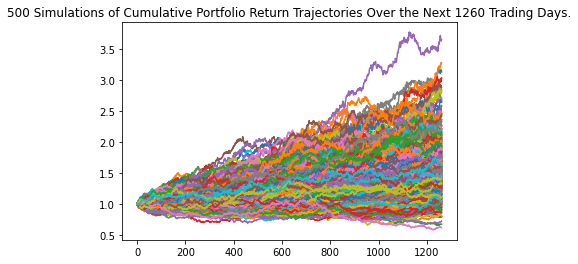

In [1416]:
# Plot simulation outcomes
plot = MC_five_years.plot_simulation()

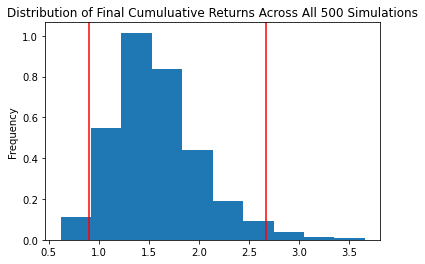

In [1418]:
# Plot probability distribution and confidence intervals
probability_chart = MC_five_years.plot_distribution()

In [1419]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              1.575931
std               0.445996
min               0.618525
25%               1.277317
50%               1.522557
75%               1.804997
max               3.653582
95% CI Lower      0.902853
95% CI Upper      2.666249
Name: 1260, dtype: float64


In [1420]:
# Set initial investment
initial_investment= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats[8]*initial_investment,2)
ci_upper_five = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54171.16 and $159974.95


### Ten Years Retirement Option

In [1421]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_new_stock_data,
    weights = [.40,.60],
    num_simulation = 500,       #500 runs
    num_trading_days = 252*10   #10 years
)

In [1422]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\MIA-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988414,0.989139,1.005344,1.004097,0.991678,0.994274,0.998822,1.005936,1.007070,1.006717,...,1.003299,1.000065,1.007700,1.004889,0.998761,0.992072,1.001159,0.990321,1.012996,0.996286
2,1.001406,0.989091,1.016740,1.009885,0.989854,0.984238,1.009213,1.001838,0.997324,1.014204,...,1.004118,1.002753,1.005533,1.009815,1.005372,0.985125,1.010401,1.004005,1.014357,1.003588
3,1.009396,0.983299,1.013319,1.009775,0.990554,0.990500,1.009528,0.996253,1.003060,1.012202,...,0.999399,1.008143,1.017719,1.011954,1.000064,0.997326,1.008174,0.996752,1.013520,0.997006
4,1.017639,0.977237,1.025462,1.008255,0.999249,1.004540,1.011538,0.989365,1.008268,1.014051,...,0.984834,0.993313,1.026833,1.011990,1.001496,0.997208,1.001402,1.005918,1.008368,1.001374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.992432,1.369211,2.320483,3.095445,1.983751,2.543388,1.860671,3.437435,2.788593,1.665903,...,1.859458,1.629956,2.947454,1.981151,2.205601,2.521778,1.855844,1.555090,1.923681,2.299749
2517,1.988142,1.377078,2.333354,3.087657,1.985278,2.539671,1.844609,3.391041,2.787305,1.672927,...,1.866241,1.628732,2.926811,1.991774,2.228623,2.539906,1.859240,1.545531,1.911245,2.319780
2518,1.972069,1.382238,2.317668,3.077676,2.005938,2.548413,1.855415,3.364653,2.804603,1.663753,...,1.862339,1.632734,2.953419,1.976959,2.213092,2.577001,1.853002,1.546013,1.920538,2.314504
2519,1.972854,1.399697,2.318993,3.021738,2.019027,2.556608,1.844106,3.347806,2.780503,1.653924,...,1.866049,1.657590,2.965302,1.983154,2.261315,2.579250,1.840636,1.529607,1.925002,2.308460


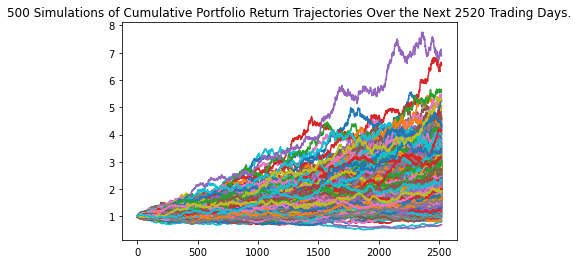

In [1423]:
# Plot simulation outcomes
plot = MC_ten_years.plot_simulation()

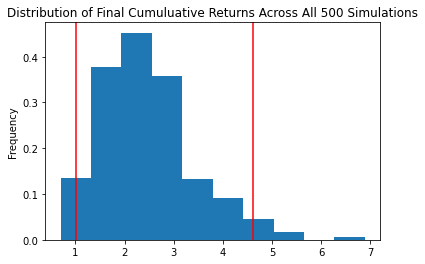

In [1424]:
# Plot probability distribution and confidence intervals
probability_chart = MC_ten_years.plot_distribution()

In [1425]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              2.453595
std               0.959056
min               0.698235
25%               1.773394
50%               2.304508
75%               2.916521
max               6.888379
95% CI Lower      1.003082
95% CI Upper      4.618947
Name: 2520, dtype: float64


In [1426]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(initial_investment * summary_stats[8], 2)
ci_upper_ten = round(initial_investment * summary_stats[9], 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60184.94 and $277136.81
